## Visualizing the dataset

In [1]:
import sys
sys.path.append("/home/jeans/internship/parking-customer-count")

from countpassenger.Config import conf
from countpassenger import Preprocess

import pandas as pd
import os.path as osp
import os

/home/jeans/internship/parking-customer-count


In [2]:
df_vehicle = pd.read_csv(
    osp.join(conf.RESOURCES_RAW_DIR, "mbk-tourist-vehicle-object-20240429.csv")
)


    Only care about
- van
- bus
- have license plate

No use collumn are
- car_brand_model  
- vehicle_type_model           
- plate_number_definition  

In [3]:
df_vehicle = Preprocess.df_clean_vehicle(df_vehicle=df_vehicle,drop_na=[],convert_truck=False)
print(df_vehicle.to_string())

        lifetime  travel_displacement  ymin  is_plate_valid       timestamp_precise  travel_trajectory            timestamp            car_brand  frame_no  travel_distance                                                                                              image_name  ymax           true_video_name  province_confidence purchasing_power  plate_image_name plate_number  xmin  car_brand_confidence                        original_video_name  plate_number_confidence similarized_plate_number vehicle_type  plate_color_confidence                      camera  xmax plate_color                                 video_name  vehicle_type_confidence province camera_cleaned  timestamp_unix
9      36.670000             0.000000   103           False 2024-04-29 16:49:59.242           0.000000  2024-04-29 16:50:01              discard      2400         0.000000   2024-04-29T23-49-59_FLAG_P_FID_2400_OID_2g2_mbk-14-11-vehicle-snapshot_1714409101_1714409399_2400.jpg   751  mbk-14-11_1714409101.mp4    

In [4]:

# sorted_vehicle = 
# print(sorted_vehicle.corr(numeric_only=True))
print(df_vehicle.sort_values(by=conf.VEHICLE_INTEREST_SNAPSHOT)[conf.VEHICLE_INTEREST_SNAPSHOT].to_string())
df_vehicle = df_vehicle[df_vehicle['camera'] == 'mbk-14-13-vehicle-snapshot']

                          camera       timestamp_precise  xmin  xmax  ymin  ymax    lifetime plate_number similarized_plate_number vehicle_type  vehicle_type_confidence
1517           mbk-14-11-vehicle 2024-04-29 02:57:57.316  1021  1717     0   217    1.879000      1ฒต9585                  1ฒด9585          bus                 0.407973
1245           mbk-14-11-vehicle 2024-04-29 06:43:16.470  1269  2307     0   412   34.990000       315234                   315234          bus                 0.753303
1224           mbk-14-11-vehicle 2024-04-29 06:50:10.882  1117  1672     0   224    0.760000          NaN                      NaN          bus                 0.434372
1214           mbk-14-11-vehicle 2024-04-29 07:12:35.322  1159  2295     0   407  162.680000       3ง4078                   3ง4078          bus                 0.727990
1216           mbk-14-11-vehicle 2024-04-29 07:13:02.794  1611  2283     0   440   33.111000       333915                   333915          van            

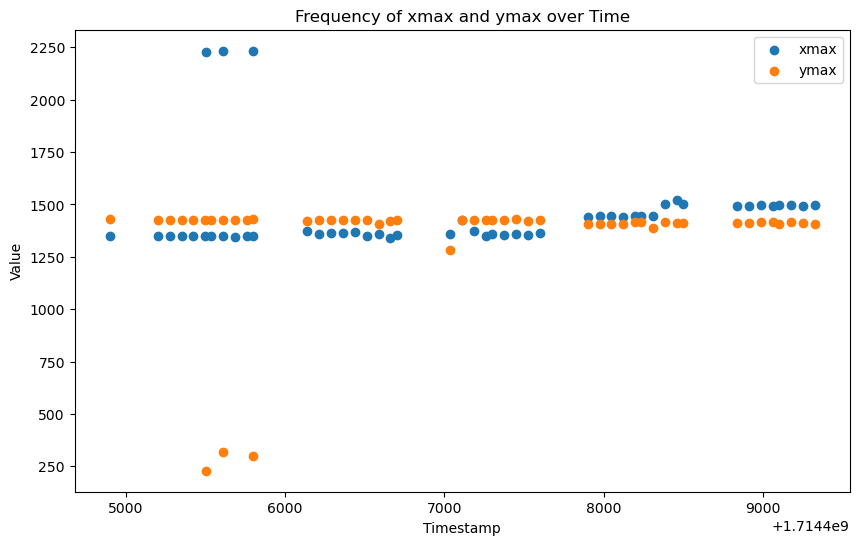

In [5]:
import matplotlib.pyplot as plt
df_vehicle = df_vehicle[0:50]
plt.figure(figsize=(10, 6))

plt.scatter(df_vehicle['timestamp_unix'], df_vehicle['xmax'], label='xmax')
plt.scatter(df_vehicle['timestamp_unix'], df_vehicle['ymax'], label='ymax')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Frequency of xmax and ymax over Time')
plt.legend()

plt.show()